In [1]:
import detectron2
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer,ColorMode
import cv2
import os
import matplotlib.pyplot as plt
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

C:\Users\ba995\anaconda3\envs\detectron\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file('COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml'))
cfg.MODEL.WEIGHTS = 'output/model_final.pth'
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 36
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
predictor = DefaultPredictor(cfg)

In [3]:
image = cv2.imread('train/0000046_png_jpg.rf.9ca154966f84afcc640389dfc488f53f.jpg')


C:\Users\ba995\anaconda3\envs\detectron\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


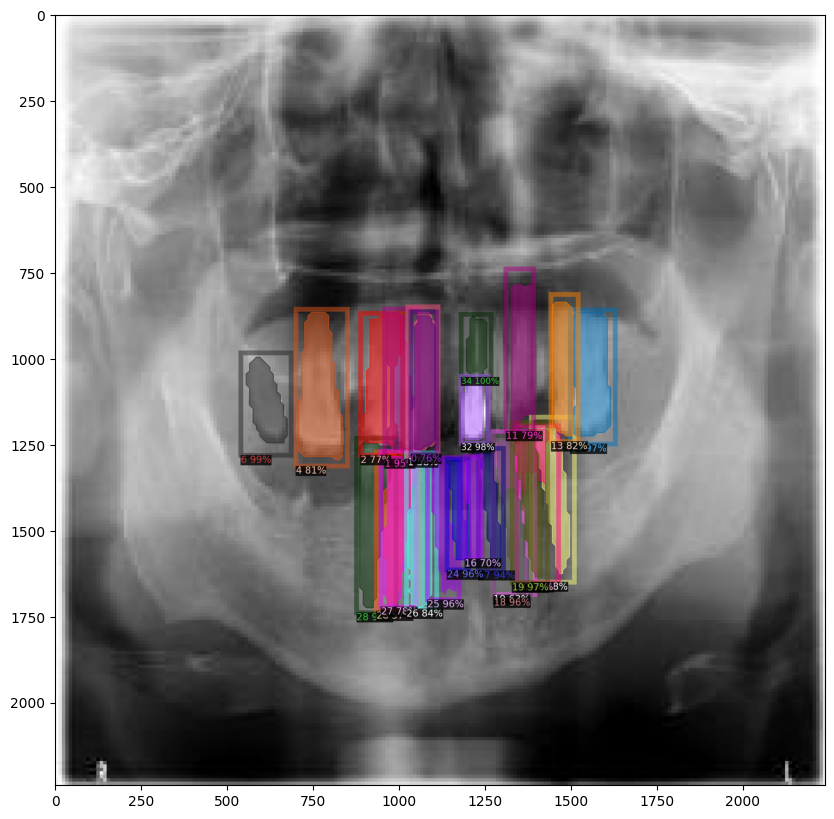

In [4]:
out = predictor(image)
v = Visualizer(image[:, :, ::-1], metadata={}, scale=10)
v = v.draw_instance_predictions(out['instances'].to('cpu'))
plt.figure(figsize=(14, 10))
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))

In [43]:
out.get_image()[:, :, ::-1].shape

(2240, 2240, 3)

In [8]:
from fastapi import FastAPI
app = Fast